c:\projects\jupyterProjects\DeepLearning-MS-AI\DL3_20241006\ch06
c:\projects\jupyterProjects\DeepLearning-MS-AI\DL3_20241006


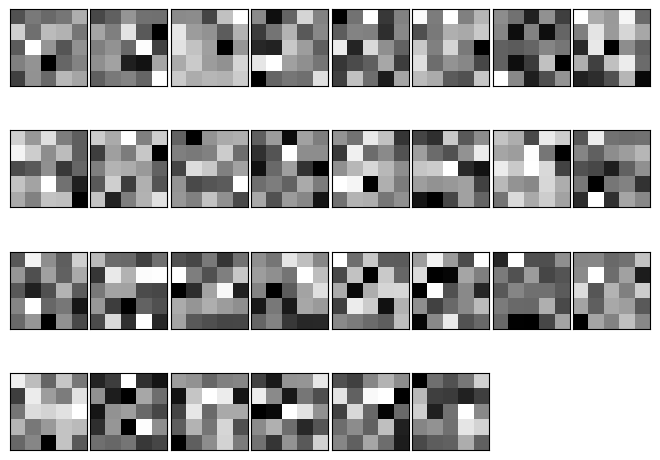

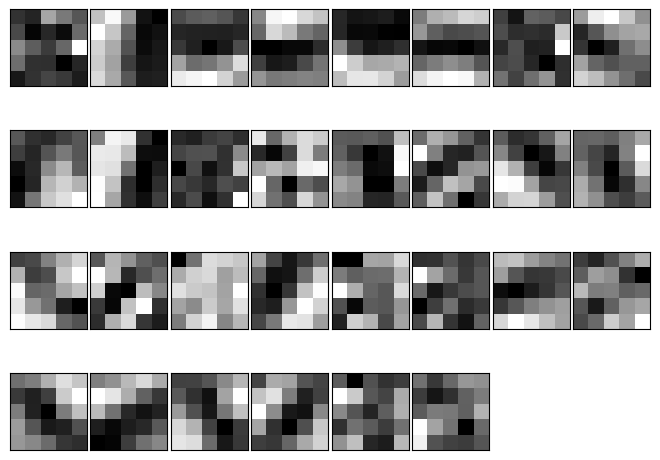

In [1]:
# coding: utf-8
import os, sys

print(os.getcwd())  # 현재 작업 디렉토리를 출력
current_dir = os.path.dirname(os.getcwd())  # 현재 디렉토리의 상위 경로를 가져옴
print(current_dir)  # 상위 디렉토리를 출력
os.chdir(current_dir)  # 상위 디렉토리로 작업 디렉토리를 변경

import numpy as np  # 넘파이(Numpy) 라이브러리를 np로 임포트
import matplotlib.pyplot as plt  # 맷플롯립 라이브러리에서 pyplot을 plt로 임포트
from ch06.simple_convnet import SimpleConvNet  # 미리 정의된 합성곱 신경망을 사용하기 위해 SimpleConvNet 클래스 임포트

def filter_show(filters, nx=8, margin=3, scale=10):
    """ 
    CNN 필터를 시각화해서 보여주는 함수
    :param filters: 필터 값 (numpy 배열)
    :param nx: 필터를 가로로 배치할 개수
    :param margin: 필터 간 간격
    :param scale: 필터 크기 확대 비율
    """
    FN, C, FH, FW = filters.shape  # 필터의 차원 (필터 개수, 채널 수, 필터 높이, 필터 너비)을 저장
    ny = int(np.ceil(FN / nx))  # 가로 nx개 기준으로 필터를 그릴 때, 필요한 세로 개수를 계산
    
    fig = plt.figure()  # 새로운 플롯(fig)을 생성
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)  # 플롯의 여백 조정

    # 각 필터를 플롯에 그려줌
    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])  # 서브플롯 추가 (x, y 축 눈금 없음)
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')  # 필터 이미지를 그레이 스케일로 표시

# 무작위 (초기화된) 추가된 합성곱 신경망을 생성
network = SimpleConvNet()  
# 학습 전 초기화된 필터를 시각화해서 그려줌
filter_show(network.params['W1'])  

# 학습이 완료된 가중치를 불러와 필터를 시각화
network.load_params("ch06/params.pkl")  # 학습된 가중치 불러오기
filter_show(network.params['W1'])  # 학습 후 CNN 필터를 다시 시각화
